# Offset Extraction
***
Determine the offset basedon measurements of hydrogen

In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


from scipy.signal import find_peaks

In [2]:
#Get Data
cols = ["wavelength", "intensity"]
raw_data1 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point1_300_900_nm.txt", delimiter="\t", names=cols)
raw_data2 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_2.txt", delimiter="\t", names=cols)
raw_data3 = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_3.txt", delimiter="\t", names=cols)
raw_data4 = pd.read_csv("DataFiles/Hydrogen_Test_slit_bigger_300_900_nm_run_1.txt", delimiter="\t", names=cols)
raw_data5 = pd.read_csv("DataFiles/Hydrogen_Test_slit_bigger_300_900_nm_run_multi_1.txt", delimiter="\t", names=cols)
raw_data6 = pd.read_csv("DataFiles/Hydrogen_slit_Smaller_300_900_nm_run_multi_1_v2.txt", delimiter="\t", names=cols)
raw_data7 = pd.read_csv("DataFiles/Hydrogen_slit_Smaller_300_900_nm_run_multi_1_v3.txt", delimiter="\t", names=cols)
raw_data8 = pd.read_csv("DataFiles/Hydrogen_slit_bigger_300_900_nm_run_multi_3_v5.txt", delimiter="\t", names=cols)


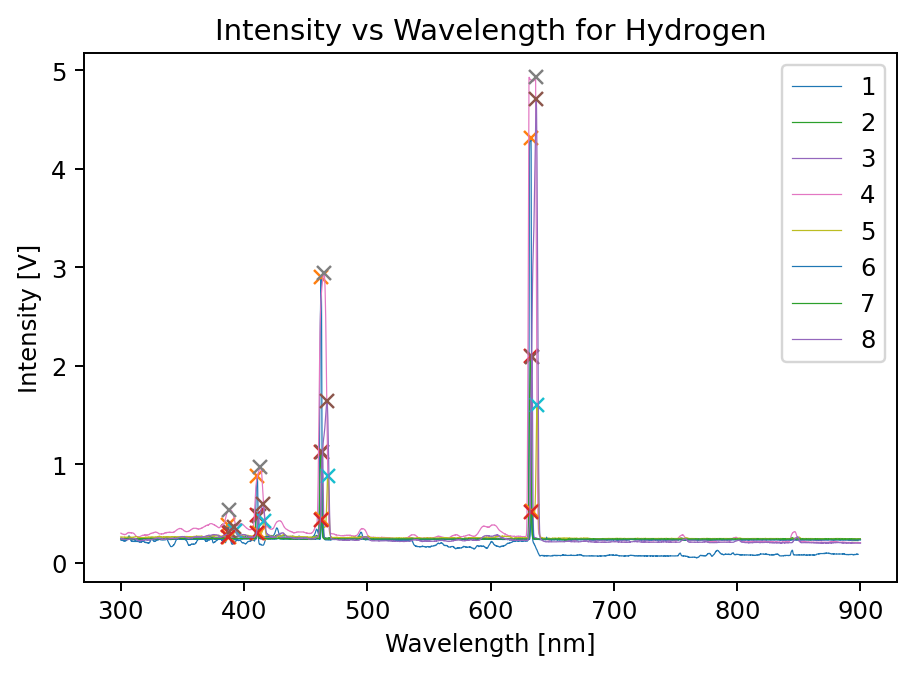

In [3]:
#Get Peaks & Plot
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Hydrogen")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")

proms = [0.15, 0.051, 0.051, 0.15, 0.05, 0.02, 0.01, 0.1]
data_files = [raw_data1, raw_data2, raw_data3, raw_data4, raw_data5, raw_data6, raw_data7, raw_data8]
expected = np.array([656.2, 486.1, 434.0, 410.1])

peak_pos = []
peak_intensity = []
peak_diff = []
peak_run = []
run_direction = []
slits = [0,0,0,1,1,0,0,1]
run_slit=[]

scaling = [0.5,0,0,-.2,-.2, -.20, -.20, -.20]

i=0
for raw_data in data_files:
    peaks, properties = find_peaks(raw_data["intensity"], height=0, prominence=proms[i], distance=50, width=5)

    plt.plot(raw_data["wavelength"], raw_data["intensity"]-scaling[i], lw=.5, label=i+1)
    plt.plot(raw_data["wavelength"][peaks], raw_data["intensity"][peaks]-scaling[i], "x")
    
    peak_pos.append(np.sort(raw_data["wavelength"][peaks]))
    peak_intensity.append(raw_data["intensity"][peaks])
    peak_diff.append(np.sort(expected) - np.sort(raw_data["wavelength"][peaks]))
    peak_run.append([i+1]*4)
    run_direction.append(4*[((raw_data["wavelength"][0] < 500) + (raw_data["wavelength"][0] > 500)*-1)])
    run_slit.append(4*[slits[i]])
    
    i+=1 
plt.legend()
#plt.ylim(0,1)

In [4]:
run_slit

[[0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [1, 1, 1, 1]]

In [5]:
peak_data = np.column_stack((np.array(peak_pos).flatten(), 
                             np.array(peak_intensity).flatten(), 
                             np.array(peak_diff).flatten(), 
                             np.array(peak_run).flatten(),
                             np.array(run_direction).flatten(),
                             np.array(run_slit).flatten()
                           ))

peak_data


peak_df = pd.DataFrame(peak_data, columns=["Position","Intensity","Peak_Diff","Run","Direction","Slit_Size"])
peak_df

,Position,Intensity,Peak_Diff,Run,Direction,Slit_Size
0,387.125,4.8133,22.975,1.0,-1.0,0.0
1,410.750,3.3990,23.250,1.0,-1.0,0.0
2,462.500,1.3797,23.600,1.0,-1.0,0.0
3,632.750,0.8883,23.450,1.0,-1.0,0.0
4,387.000,2.0951,23.100,2.0,-1.0,0.0
5,410.625,1.1273,23.375,2.0,-1.0,0.0
6,462.500,0.4842,23.600,2.0,-1.0,0.0
7,632.375,0.3121,23.825,2.0,-1.0,0.0
8,388.125,0.3183,21.975,3.0,1.0,0.0
9,411.750,0.4764,22.250,3.0,1.0,0.0


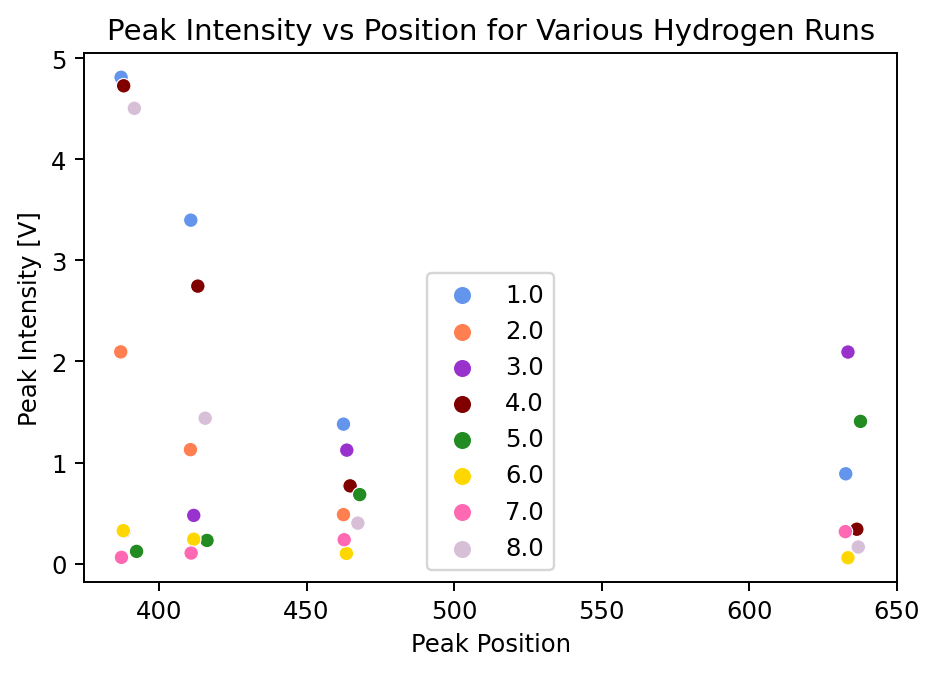

In [6]:
plt.figure(dpi=175)
plt.title("Peak Intensity vs Position for Various Hydrogen Runs")
plt.ylabel("Peak Intensity [V]")
plt.xlabel("Peak Position")
colors = ["cornflowerblue","coral","darkorchid","maroon","forestgreen","gold","hotpink","thistle"]
#run_labels = 

#flat_colors = [item for sublist in colors for item in sublist]

#for i in range(len(colors)):
    #plt.scatter(peak_data[4*i:4*(i+1),0], peak_data[4*i:4*(i+1),1], c=colors[i], alpha=0.5, label=f"Run {i+1}")#[peak_data[:,2]-1])

sns.scatterplot(data=peak_df, x="Position", y="Intensity", hue="Run", palette=sns.color_palette(colors))

plt.legend()

plt.savefig("Plots/HydrogenPeaks.pdf")

In [7]:
np.corrcoef(peak_df["Slit_Size"],peak_df["Peak_Diff"])

array([[ 1.        , -0.88369784],
       [-0.88369784,  1.        ]])

In [8]:
np.corrcoef(peak_df["Intensity"],peak_df["Peak_Diff"])

array([[1.        , 0.01509983],
       [0.01509983, 1.        ]])

In [9]:
np.corrcoef(peak_df["Direction"],peak_df["Peak_Diff"])

array([[ 1.        , -0.14077914],
       [-0.14077914,  1.        ]])

In [10]:
np.corrcoef(np.array(8*[1,2,3,4]),peak_df["Peak_Diff"])

array([[1.        , 0.06211417],
       [0.06211417, 1.        ]])

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-pa

<Figure size 1050x700 with 0 Axes>

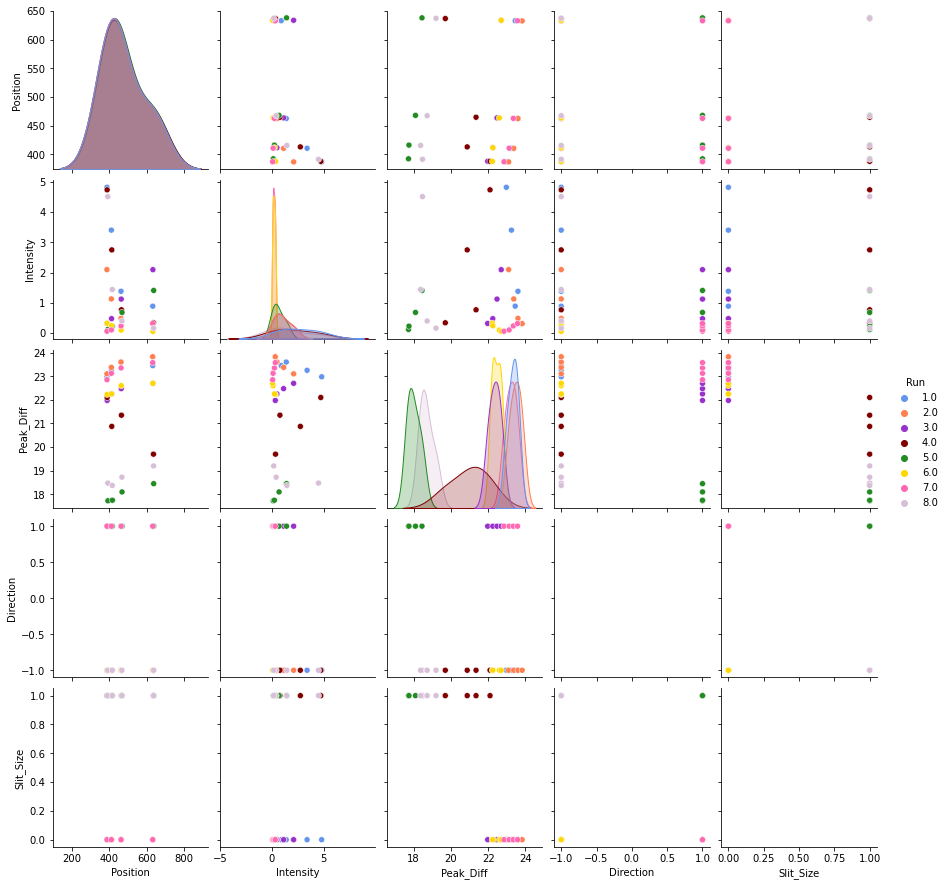

In [11]:
plt.figure(dpi=175)
sns.pairplot(peak_df, hue="Run", palette=sns.color_palette(colors))

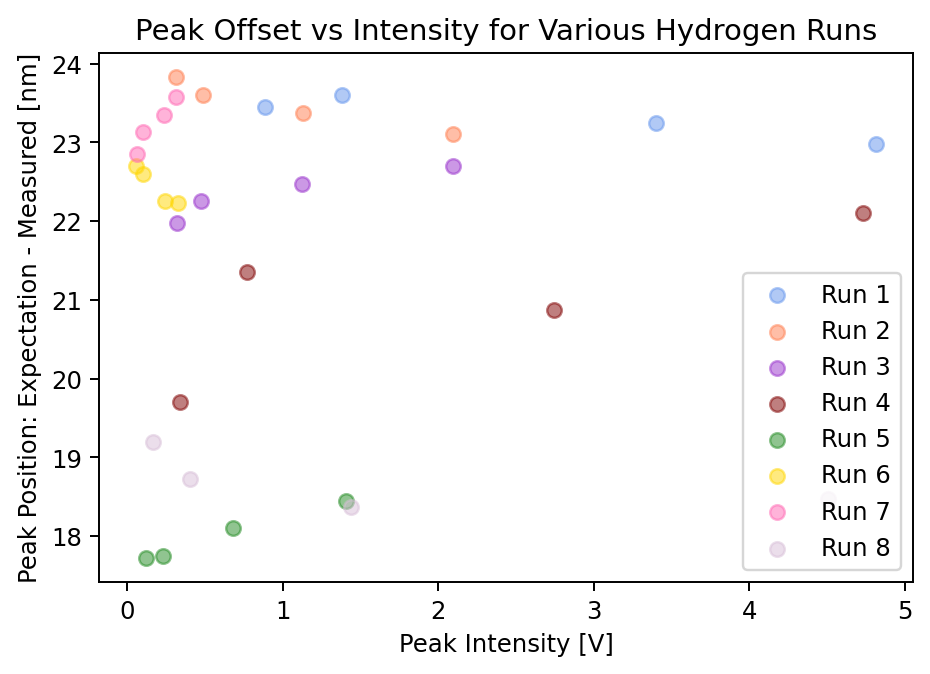

In [12]:
plt.figure(dpi=175)
plt.title("Peak Offset vs Intensity for Various Hydrogen Runs")
plt.ylabel("Peak Position: Expectation - Measured [nm]")
plt.xlabel("Peak Intensity [V]")
colors = ["cornflowerblue","coral","darkorchid","maroon","forestgreen","gold","hotpink","thistle"]
#run_labels = 

#flat_colors = [item for sublist in colors for item in sublist]

for i in range(len(colors)):
    plt.scatter(peak_data[4*i:4*(i+1),1], peak_data[4*i:4*(i+1),2], c=colors[i], alpha=0.5, label=f"Run {i+1}")#[peak_data[:,2]-1])

plt.legend()

plt.savefig("Plots/HydrogenPeaks_Intensity_Offset.pdf")

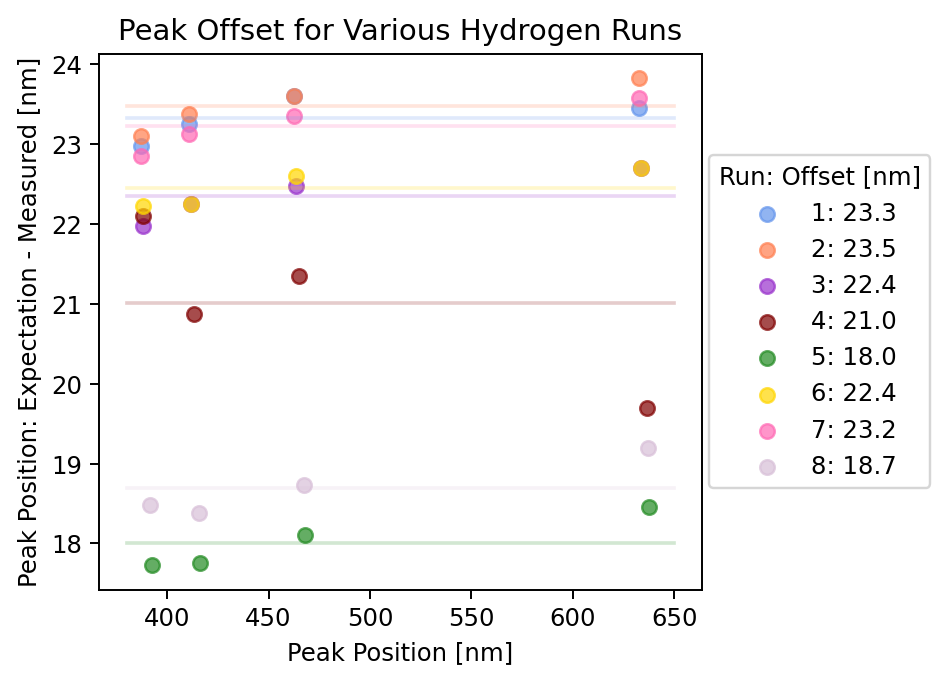

In [13]:
plt.figure(dpi=175)
plt.title("Peak Offset for Various Hydrogen Runs")
plt.ylabel("Peak Position: Expectation - Measured [nm]")
plt.xlabel("Peak Position [nm]")
colors = ["cornflowerblue","coral","darkorchid","maroon","forestgreen","gold","hotpink","thistle"]
#run_labels = 

#flat_colors = [item for sublist in colors for item in sublist]

offset_means = []
for i in range(len(colors)):
    off_mean = np.mean(peak_data[4*i:4*(i+1),2])
    offset_means.append(off_mean)
    plt.scatter(peak_data[4*i:4*(i+1),0], peak_data[4*i:4*(i+1),2], c=colors[i], alpha=0.7, 
                label=f"{i+1}: {off_mean:.1f}")
    plt.plot([380,650],2*[off_mean], c=colors[i], alpha=0.2)

plt.legend(bbox_to_anchor=(1.4, 0.5), loc='center right', title="Run: Offset [nm]")

plt.tight_layout()
plt.savefig("Plots/Hydrogen_Offset.pdf")

In [14]:
print((np.array(offset_means)[[0,1,6]]).std())

print((np.array(offset_means)[[2,5]]).std())

print((np.array(offset_means)[[4,7]]).std())

0.10311973892303818
0.046875
0.34375


In [15]:
np.array(offset_means)[[4,7]]

array([18.00625, 18.69375])

In [16]:
peak_data[4*2:4*(2+1),1] - peak_data[4*1:4*(1+1),1]

array([-1.7768, -0.6509,  0.6384,  1.7814])

In [17]:
peak_data[:,2]-1

array([21.975, 22.25 , 22.6  , 22.45 , 22.1  , 22.375, 22.6  , 22.825,
       20.975, 21.25 , 21.475, 21.7  , 21.1  , 19.875, 20.35 , 18.7  ,
       16.725, 16.75 , 17.1  , 17.45 , 21.225, 21.25 , 21.6  , 21.7  ,
       21.85 , 22.125, 22.35 , 22.575, 17.475, 17.375, 17.725, 18.2  ])

In [18]:
colors

['cornflowerblue',
 'coral',
 'darkorchid',
 'maroon',
 'forestgreen',
 'gold',
 'hotpink',
 'thistle']

In [23]:
[0,1,0,0] * 2

[0, 1, 0, 0, 0, 1, 0, 0]